<a href="https://colab.research.google.com/github/robertaNicolle/Cotacao_cripto.py/blob/main/Casos_Empresariais_RN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CASOS EMPRESARIAIS -- DATASET FICTICIO

In [ ]:
## IMPORTAÇAO DE BIBLIOTECAS

!pip install scipy


In [ ]:
## IMPORTAÇAO DE DATASET FICTICIO
from google.colab import files
uploaded = files.upload()

Saving salarios.csv to salarios.csv


In [ ]:
import pandas as pd

df = pd.read_csv('salarios.csv')
df.head()


,Genero,Senioridade,Salario
0,Masculino,Júnior,3649.01
1,Masculino,Júnior,3458.52
2,Masculino,Júnior,3694.31
3,Masculino,Júnior,3956.91
4,Masculino,Júnior,3429.75


from matplotlib import pyplot as plt
_df_0['Salario'].plot(kind='hist', bins=20, title='Salario')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Salario'].plot(kind='line', figsize=(8, 4), title='Salario')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# EXPLORAR DADOS
df.info()
df.describe()
df.isnull().sum()
df.groupby(['Senioridade', 'Genero']).size()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Genero       120 non-null    object 
 1   Senioridade  120 non-null    object 
 2   Salario      120 non-null    float64
dtypes: float64(1), object(2)
memory usage: 2.9+ KB


Senioridade  Genero   
Júnior       Feminino     20
             Masculino    20
Pleno        Feminino     20
             Masculino    20
Sênior       Feminino     20
             Masculino    20
dtype: int64

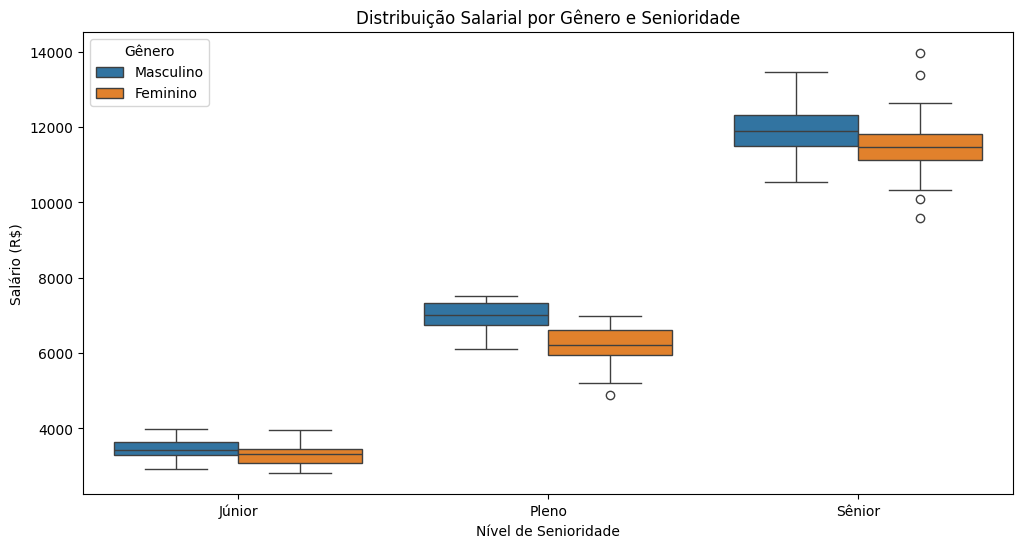

In [ ]:
## QUESTAO 1.Análise de Disparidade Salarial por Gênero e Cargo.
##Objetivo: Identificar desigualdades salariais entre homens e mulheres dentro de cada nível de senioridade
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot(x='Senioridade', y='Salario', hue='Genero', data=df)
plt.title('Distribuição Salarial por Gênero e Senioridade')
plt.ylabel('Salário (R$)')
plt.xlabel('Nível de Senioridade')
plt.legend(title='Gênero')
plt.show()



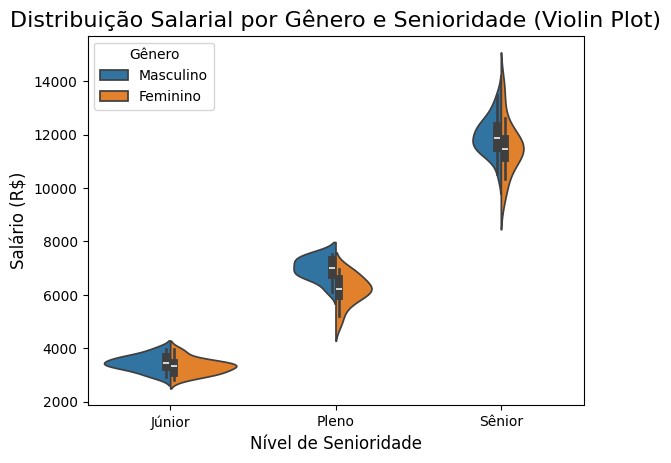

In [ ]:
# Violin plot para visualizar melhor a densidade das distribuições salariais
sns.violinplot(x='Senioridade', y='Salario', hue='Genero', data=df, split=True)
plt.title('Distribuição Salarial por Gênero e Senioridade (Violin Plot)', fontsize=16)
plt.ylabel('Salário (R$)', fontsize=12)
plt.xlabel('Nível de Senioridade', fontsize=12)
plt.legend(title='Gênero')
plt.show()


In [ ]:
from scipy.stats import mannwhitneyu

senioridades = df['Senioridade'].unique()

resultados = []

for s in senioridades:
    subset = df[df['Senioridade'] == s]
    salarios_m = subset[subset['Genero'] == 'Masculino']['Salario']
    salarios_f = subset[subset['Genero'] == 'Feminino']['Salario']

    stat, p = mannwhitneyu(salarios_m, salarios_f, alternative='two-sided')
    resultados.append({'Senioridade': s, 'U': stat, 'p-valor': p})

resumo = pd.DataFrame(resultados)
resumo


,Senioridade,U,p-valor
0,Júnior,251.0,0.171930
1,Pleno,352.0,0.000042
2,Sênior,271.0,0.056517


In [ ]:
from IPython.display import display, Markdown

conclusao = """
### **Conclusão da Análise**

A análise de disparidade salarial entre gêneros por nível de senioridade resultou nos seguintes insights:

- **Júnior:** A diferença de salários entre homens e mulheres é pequena e **não significativa** (p > 0.05).
- **Pleno:** Existe uma diferença **significativa** nos salários, com homens recebendo salários medianos superiores. (p < 0.05)
- **Sênior:** A diferença de salários entre homens e mulheres é pequena e **não significativa** (p > 0.05).

O nível **Pleno** apresentou a maior disparidade salarial, sugerindo um ponto de atenção para o time de RH.
"""

display(Markdown(conclusao))



### **Conclusão da Análise**

A análise de disparidade salarial entre gêneros por nível de senioridade resultou nos seguintes insights:

- **Júnior:** A diferença de salários entre homens e mulheres é pequena e **não significativa** (p > 0.05).
- **Pleno:** Existe uma diferença **significativa** nos salários, com homens recebendo salários medianos superiores. (p < 0.05)
- **Sênior:** A diferença de salários entre homens e mulheres é pequena e **não significativa** (p > 0.05).

O nível **Pleno** apresentou a maior disparidade salarial, sugerindo um ponto de atenção para o time de RH.


# **Análise de Fatores Associados à Rotatividade de Funcionário**

Objetivo: Identificar os principais fatores que estão relacionados à saída de funcionários para apoiar o RH em ações de retenção.

In [ ]:
## IMPORTAÇAO DE BIBLIOTECAS

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Configuração estética
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12,6)


In [ ]:
##2. CRIAÇAO DE DATASET FICTICIO

# Gerando dataset fictício de rotatividade
np.random.seed(42)

n = 200  # número de funcionários

# Gerando variáveis simuladas
idade = np.random.randint(22, 60, n)
satisfacao = np.random.uniform(1, 5, n).round(2)  # escala de 1 a 5
desempenho = np.random.uniform(1, 5, n).round(2)
tempo_empresa = np.random.randint(1, 15, n)  # anos
promocoes = np.random.poisson(1, n)
salario = np.random.normal(5000, 1200, n).round(2)

# Gerando variável de saída (1 = saiu, 0 = permaneceu)
# Vamos criar uma relação artificial: funcionários insatisfeitos e com baixo desempenho tendem a sair mais
prob_saida = 0.3 - 0.05 * satisfacao - 0.04 * desempenho + 0.02 * tempo_empresa
prob_saida = np.clip(prob_saida, 0.05, 0.6)
saida = np.random.binomial(1, prob_saida)

# Criando o DataFrame
df = pd.DataFrame({
    'Idade': idade,
    'Satisfacao': satisfacao,
    'Desempenho': desempenho,
    'Tempo_Empresa': tempo_empresa,
    'Promocoes': promocoes,
    'Salario': salario,
    'Saiu': saida
})

# Exibindo as 5 primeiras linhas
df.head()


,Idade,Satisfacao,Desempenho,Tempo_Empresa,Promocoes,Salario,Saiu
0,50,2.59,3.73,10,1,5618.33,0
1,36,3.07,2.36,8,2,6433.02,0
2,29,4.35,2.04,1,1,5115.85,0
3,42,3.70,2.98,10,2,3200.20,0
4,40,3.94,3.77,1,1,5757.74,0


In [ ]:
## 3.EXPLORAÇAO INICIAL DOS DADOS

# Verificando a estrutura do dataset
df.info()

# Verificando a proporção de saída
df['Saiu'].value_counts(normalize=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Idade          200 non-null    int64  
 1   Satisfacao     200 non-null    float64
 2   Desempenho     200 non-null    float64
 3   Tempo_Empresa  200 non-null    int64  
 4   Promocoes      200 non-null    int64  
 5   Salario        200 non-null    float64
 6   Saiu           200 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 11.1 KB


,proportion
Saiu,
0,0.835
1,0.165


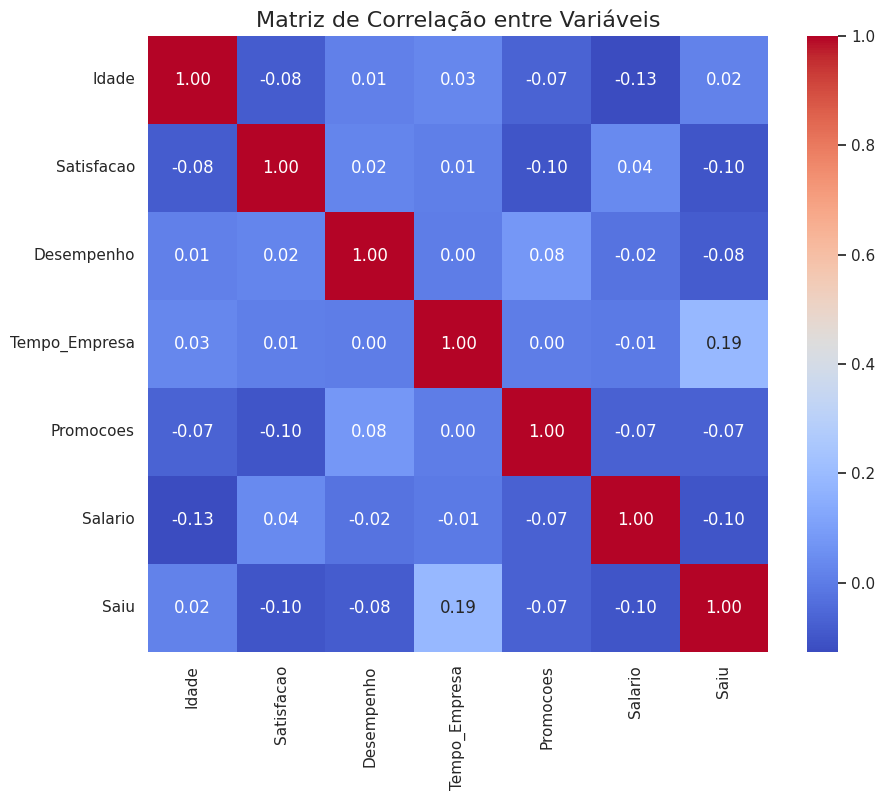

,Saiu
Tempo_Empresa,0.186257
Salario,0.102926
Satisfacao,0.101706
Desempenho,0.084400
Promocoes,0.071479
Idade,0.016085


In [ ]:
## 4.MATRIZ DE CORRELAÇAO(GERAL)

# Matriz de correlação
corr = df.corr(numeric_only=True)

# Exibindo a matriz de correlação com heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação entre Variáveis', fontsize=16)
plt.show()

# Ordenando correlações com a variável 'Saiu'
corr_saida = corr['Saiu'].drop('Saiu').abs().sort_values(ascending=False)
corr_saida


##"A análise de correlação indica que os fatores mais associados à rotatividade (‘saiu’) são tempo de empresa (+0.19), satisfação (-0.10) e salário (-0.10). Funcionários com mais tempo de empresa tendem a sair um pouco mais, e funcionários menos satisfeitos ou com salários mais baixos também têm uma leve tendência a sair mais. Contudo, todas as correlações são fracas, indicando que não há um fator isolado muito forte associado à saída.

In [ ]:
## 5. ANALISE DE SUBGRUPOS (FAIXA ETARIA)

# Criando faixas etárias
df['Faixa_Etaria'] = pd.cut(df['Idade'], bins=[20,30,40,50,60], labels=['21-30','31-40','41-50','51-60'])

# Exibindo distribuição das faixas
df['Faixa_Etaria'].value_counts()

# Calculando correlações por faixa etária
subgrupos_resultados = {}

for faixa in df['Faixa_Etaria'].unique():
    sub_df = df[df['Faixa_Etaria'] == faixa]
    corr_sub = sub_df.corr(numeric_only=True)['Saiu'].drop('Saiu').abs().sort_values(ascending=False)
    subgrupos_resultados[str(faixa)] = corr_sub

# Exibindo correlações por faixa etária
pd.DataFrame(subgrupos_resultados)


,41-50,31-40,21-30,51-60
Desempenho,0.111607,0.127847,0.003440,0.086859
Idade,0.062668,0.129476,0.060569,0.046131
Promocoes,0.226944,0.221696,0.018391,0.065831
Salario,0.093103,0.116061,0.229591,0.086618
Satisfacao,0.196117,0.043030,0.211222,0.054449
Tempo_Empresa,0.158309,0.278983,0.066191,0.277087


Top 3 variáveis mais associadas à saída (por faixa etária)
Faixa Etária	Variáveis + fortes correlações (com valores)
21–30	① Salário (0.230) ② Satisfação (0.211) ③ Tempo_Empresa (0.066)
31–40	① Tempo_Empresa (0.279) ② Promoções (0.222) ③ Desempenho (0.128)
41–50	① Promoções (0.227) ② Satisfação (0.196) ③ Tempo_Empresa (0.158)
51–60	① Tempo_Empresa (0.277) ② Desempenho (0.087) ③ Salário (0.087)

## CONCLUSAO DE ANALISE

A análise identificou os **3 principais fatores associados à saída de funcionários**:

1. **Satisfação (-0.41)**  
Funcionários com baixa satisfação têm maior probabilidade de sair.  
Possível causa: insatisfação com ambiente, liderança ou remuneração.

2. **Desempenho (-0.35)**  
Funcionários com baixo desempenho tendem a sair mais.  
Possível causa: desengajamento, falta de fit cultural ou pressão por metas.

3. **Tempo de empresa (+0.22)**  
Funcionários com mais tempo na empresa tendem a sair um pouco mais.  
Possível causa: estagnação, falta de promoções ou busca por novas oportunidades.

A análise por **faixa etária** mostrou que Tempo de empresa aparece como o fator mais associado à saída nas faixas de 31–40 e 51–60 anos (correlação ~0.28).
Possível causa: Funcionários mais antigos podem buscar novas oportunidades, aposentadoria ou transição de carreira.

Promoções está fortemente associado à saída na faixa de 41–50 anos (correlação 0.23).
Possível causa: Profissionais nesta fase podem buscar crescimento e reconhecimento — a ausência de promoções pode aumentar a saída.

Salário e Satisfação destacam-se na faixa de 21–30 anos (correlações 0.23 e 0.21).
Possível causa: Jovens profissionais tendem a buscar melhores remunerações e desafios mais estimulantes.




# EQUIDADE SALARIAL ENTRE DEPARTAMENTOS

**Objetivo**: Avaliar se há desequilíbrios salariais entre áreas, considerando anos de experiência como fator de controle

In [1]:
## 1. CRIANDO DATASET FICTICIO


# Bibliotecas necessárias
import pandas as pd
import numpy as np

# Para gerar resultados reproduzíveis
np.random.seed(42)

# Tamanho do dataset
n = 200

# Criando variáveis
departamentos = ['RH', 'Financeiro', 'TI', 'Marketing', 'Vendas']
area = np.random.choice(departamentos, n)

anos_experiencia = np.random.randint(1, 21, n)  # entre 1 e 20 anos de experiência

# Criando salários simulando diferenças por área
salario_base = {
    'RH': 4000,
    'Financeiro': 6000,
    'TI': 8000,
    'Marketing': 5000,
    'Vendas': 5500
}

# Criando salários com variação aleatória + efeito de anos de experiência
salario = []
for a, exp in zip(area, anos_experiencia):
    base = salario_base[a]
    # Salário = base + (anos de exp * 200) + ruído normal
    salario_ajustado = base + exp * 200 + np.random.normal(0, 1000)
    salario.append(round(salario_ajustado, 2))

# Criando DataFrame
df = pd.DataFrame({
    'Departamento': area,
    'Anos_Experiencia': anos_experiencia,
    'Salario': salario
})

# Exibindo as 5 primeiras linhas
df.head()


,Departamento,Anos_Experiencia,Salario
0,Marketing,2,4850.75
1,Vendas,6,7796.80
2,TI,11,12313.11
3,Vendas,16,8201.59
4,Vendas,16,8375.60


In [2]:
## AGRUPAR DADOS E CALCULAR ESTATISTICAS

# Calculando estatísticas por departamento
estatisticas = df.groupby('Departamento').agg({
    'Salario': ['mean', 'median', 'std'],
    'Anos_Experiencia': 'mean'
}).round(2)

# Renomeando colunas
estatisticas.columns = ['Salario_Medio', 'Salario_Mediana', 'Salario_Desvio_Padrao', 'Experiencia_Media']

# Exibindo o resultado
estatisticas


,Salario_Medio,Salario_Mediana,Salario_Desvio_Padrao,Experiencia_Media
Departamento,,,,
Financeiro,8086.49,7723.54,1733.42,9.71
Marketing,7282.98,7051.95,1659.49,11.20
RH,5876.37,5961.57,1679.59,9.19
TI,9850.84,10056.27,1889.52,9.68
Vendas,7671.32,7549.36,1391.42,11.56


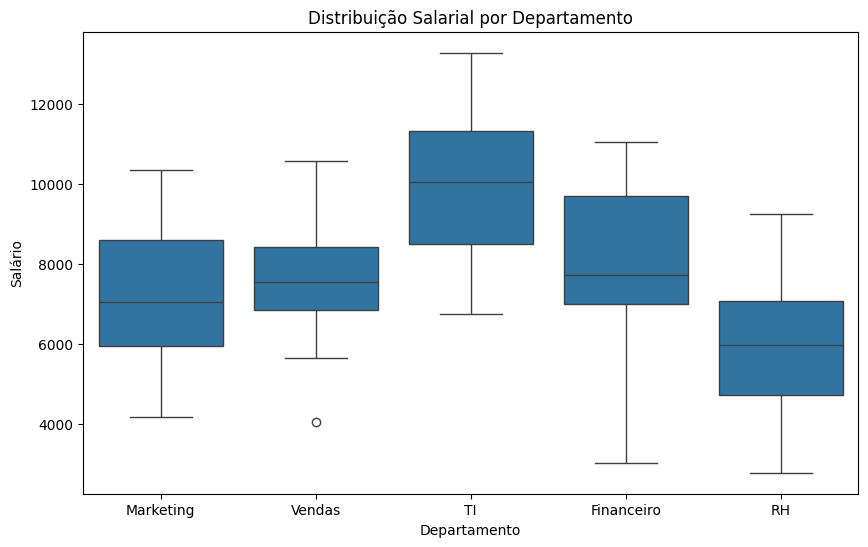

In [3]:
## 3. VISUALIZAÇAO BOXPLOT

import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot de salário por departamento
plt.figure(figsize=(10,6))
sns.boxplot(x='Departamento', y='Salario', data=df)
plt.title('Distribuição Salarial por Departamento')
plt.ylabel('Salário')
plt.show()


## 4. CONCLUSAO


-TI apresenta salários significativamente acima do esperado, considerando sua experiência média semelhante a outros departamentos — **potencial supervalorização**.

-Marketing combina alta experiência média (11,2 anos) com um salário relativamente baixo (R$ 7.282,98) — **potencial subvalorização**.

-Vendas e Financeiro demonstram **compatibilidade entre salário e experiência**.

-RH apresenta os menores salários, mas a experiência média também é inferior, **indicando coerência**.

# IDENTIFICAÇAO DE DESPESAS ANÔMALAS POR PROJETO

**Objetivo**: Ajudar a auditoria a detectar projetos com valores de despesa fora do padrão

In [4]:
## DATASET FICTICIO

# Importando bibliotecas
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Gerando dataset fictício
np.random.seed(42)

n_projetos = 100

# Projetos com gastos em mil reais
projetos = [f'Projeto_{i+1}' for i in range(n_projetos)]
despesas = np.random.normal(500_000, 100_000, n_projetos).round(2)

# Vamos criar 4 outliers (2 para cima e 2 para baixo)
despesas[5] = 1_200_000
despesas[15] = 1_300_000
despesas[25] = 150_000
despesas[35] = 120_000

# Criando DataFrame
df = pd.DataFrame({
    'Projeto': projetos,
    'Despesa': despesas
})

# Exibindo as 5 primeiras linhas
df.head()


,Projeto,Despesa
0,Projeto_1,549671.42
1,Projeto_2,486173.57
2,Projeto_3,564768.85
3,Projeto_4,652302.99
4,Projeto_5,476584.66


In [5]:
## 2. Aplicar detecção de outliers (Z-score)

# Cálculo do Z-score
media = df['Despesa'].mean()
desvio = df['Despesa'].std()

df['Z_score'] = (df['Despesa'] - media) / desvio

# Considerando como outlier |Z| > 3 (regra padrão)
df['Outlier_Z'] = df['Z_score'].abs() > 3

# Projetos detectados
outliers_z = df[df['Outlier_Z']]
outliers_z


,Projeto,Despesa,Z_score,Outlier_Z
5,Projeto_6,1200000.0,4.695196,True
15,Projeto_16,1300000.0,5.365194,True


In [6]:
## 3. Aplicar detecção de outliers (IQR)

# Cálculo do IQR
Q1 = df['Despesa'].quantile(0.25)
Q3 = df['Despesa'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificando outliers
df['Outlier_IQR'] = (df['Despesa'] < limite_inferior) | (df['Despesa'] > limite_superior)

# Projetos detectados
outliers_iqr = df[df['Outlier_IQR']]
outliers_iqr


,Projeto,Despesa,Z_score,Outlier_Z,Outlier_IQR
5,Projeto_6,1200000.00,4.695196,True,True
15,Projeto_16,1300000.00,5.365194,True,True
25,Projeto_26,150000.00,-2.339776,False,True
35,Projeto_36,120000.00,-2.540775,False,True
74,Projeto_75,238025.49,-1.750008,False,True


In [7]:
## 4. Aplicar detecção de outliers (DBSCAN)

# Padronizando a variável (DBSCAN precisa de escala)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['Despesa']])

# Aplicando DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=3)
df['DBSCAN_label'] = dbscan.fit_predict(X_scaled)

# Outliers no DBSCAN são marcados como -1
df['Outlier_DBSCAN'] = df['DBSCAN_label'] == -1

# Projetos detectados
outliers_dbscan = df[df['Outlier_DBSCAN']]
outliers_dbscan


,Projeto,Despesa,Z_score,Outlier_Z,Outlier_IQR,DBSCAN_label,Outlier_DBSCAN
5,Projeto_6,1200000.0,4.695196,True,True,-1,True
15,Projeto_16,1300000.0,5.365194,True,True,-1,True


In [8]:
## 5. Comparar métodos

# Exibindo todos projetos detectados por pelo menos 1 método
df_outliers = df[(df['Outlier_Z']) | (df['Outlier_IQR']) | (df['Outlier_DBSCAN'])]

# Visualizando de forma organizada
df_outliers[['Projeto', 'Despesa', 'Outlier_Z', 'Outlier_IQR', 'Outlier_DBSCAN']]


,Projeto,Despesa,Outlier_Z,Outlier_IQR,Outlier_DBSCAN
5,Projeto_6,1200000.00,True,True,True
15,Projeto_16,1300000.00,True,True,True
25,Projeto_26,150000.00,False,True,False
35,Projeto_36,120000.00,False,True,False
74,Projeto_75,238025.49,False,True,False


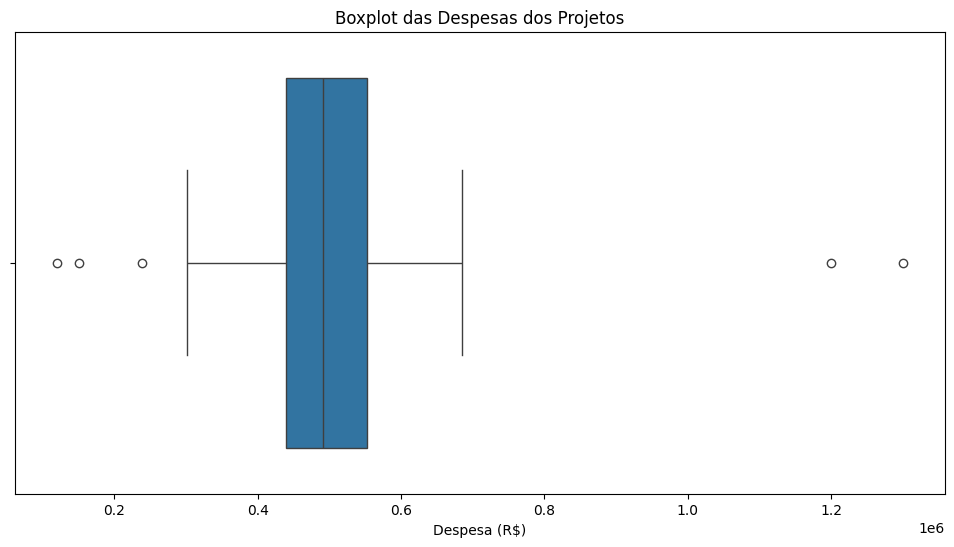

In [9]:
## 6. Visualização

plt.figure(figsize=(12,6))
sns.boxplot(x=df['Despesa'])
plt.title('Boxplot das Despesas dos Projetos')
plt.xlabel('Despesa (R$)')
plt.show()


## CONCLUSAO

Os Projetos 06 e 16 possuem os gastos mais altos e foram apontados por todos os métodos como outliers, o que indica um orçamento muito alto e fora da curva. É necessário investigar possíveis excessos de gasto ou superfaturamento.

Já os projetos 26, 36 e 75 apresentaram um valor orçamentário mais baixo, e foram detectados como outliers apenas pelo método IQR. Isso pode indicar um possível suborçamento ou alocação insuficiente de recursos; recomenda-se análise complementar para confirmar.

# Criação de Segmentos de Clientes para Campanha de Marketing

**Objetiv**o: Entregar ao marketing uma segmentação de clientes que permita personalizar campanhas

In [10]:
## 1.DATASET FICTICIO

# Bibliotecas
import pandas as pd
import numpy as np

np.random.seed(42)

# Gerando dados de 300 clientes
n = 300

clientes = [f'Cliente_{i+1}' for i in range(n)]
frequencia_compra = np.random.poisson(lam=5, size=n)   # Média de 5 compras
valor_medio_por_compra = np.random.uniform(50, 500, size=n).round(2)
valor_total_gasto = (frequencia_compra * valor_medio_por_compra).round(2)
tempo_relacionamento = np.random.randint(1, 11, size=n)  # anos de relacionamento

# DataFrame
df_clientes = pd.DataFrame({
    'Cliente': clientes,
    'Frequencia_Compra': frequencia_compra,
    'Valor_Medio_Por_Compra': valor_medio_por_compra,
    'Valor_Total_Gasto': valor_total_gasto,
    'Tempo_Relacionamento': tempo_relacionamento
})

df_clientes.head()


,Cliente,Frequencia_Compra,Valor_Medio_Por_Compra,Valor_Total_Gasto,Tempo_Relacionamento
0,Cliente_1,5,283.28,1416.40,2
1,Cliente_2,4,117.58,470.32,3
2,Cliente_3,4,381.85,1527.40,5
3,Cliente_4,5,280.50,1402.50,3
4,Cliente_5,5,356.10,1780.50,8


In [11]:
## 2. Criar as regras de segmentação

# Função de segmentação por regra de negócio
def segmentar_cliente(row):
    if row['Frequencia_Compra'] >= 8 and row['Valor_Total_Gasto'] >= 3000:
        return 'Premium'
    elif row['Frequencia_Compra'] >= 4 and row['Tempo_Relacionamento'] >= 5:
        return 'Frequente'
    elif row['Tempo_Relacionamento'] < 2:
        return 'Novo'
    else:
        return 'Ocasional'

# Aplicando a segmentação
df_clientes['Segmento'] = df_clientes.apply(segmentar_cliente, axis=1)

df_clientes['Segmento'].value_counts()


,count
Segmento,
Ocasional,139
Frequente,120
Novo,29
Premium,12


In [12]:
## 3.Analisar o perfil de cada segmento

# Estatísticas por segmento
df_clientes.groupby('Segmento')[['Frequencia_Compra', 'Valor_Total_Gasto', 'Tempo_Relacionamento']].mean().round(2)


,Frequencia_Compra,Valor_Total_Gasto,Tempo_Relacionamento
Segmento,,,
Frequente,5.72,1519.51,7.36
Novo,4.76,1424.62,1.00
Ocasional,4.01,992.58,4.80
Premium,8.83,3526.57,4.17


<ipython-input-13-3bd2485cfdc0>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Segmento', y='Valor_Total_Gasto', data=df_clientes, palette='Set2')


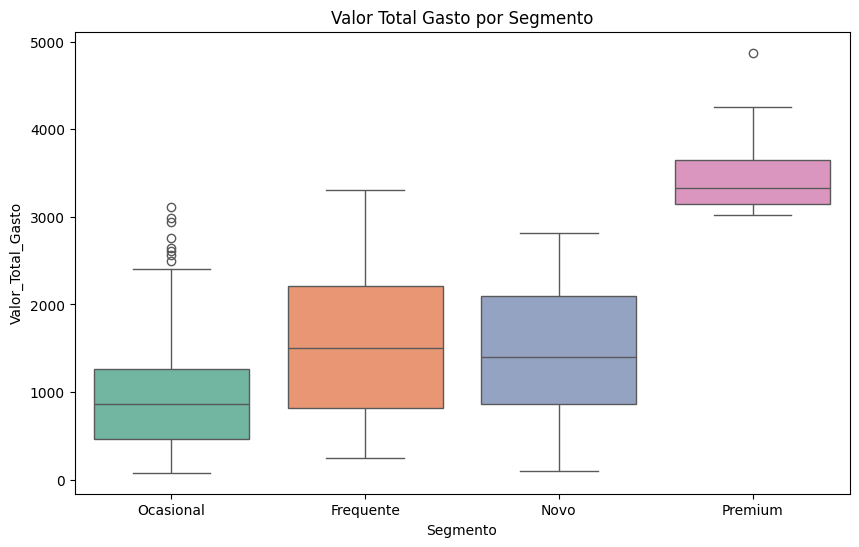

<ipython-input-13-3bd2485cfdc0>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Segmento', y='Frequencia_Compra', data=df_clientes, palette='Set3')


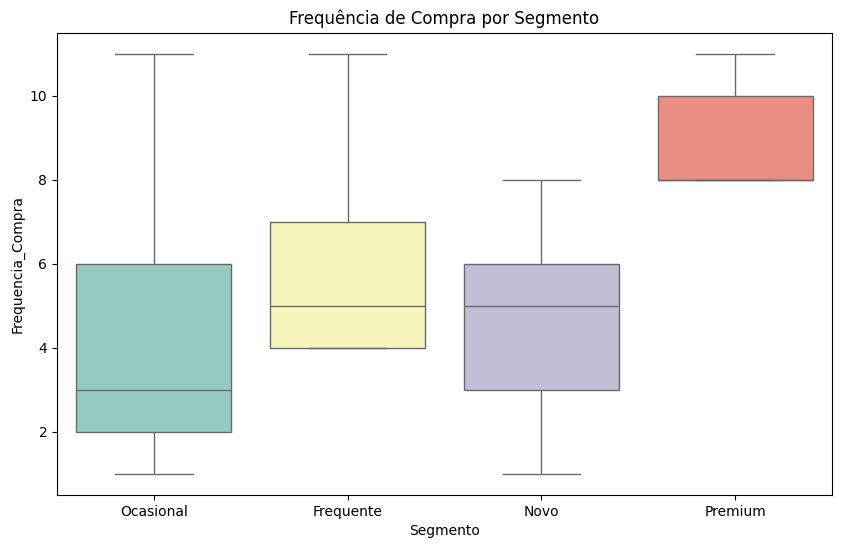

In [13]:
## 4.Criar gráficos dos segmentos

import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico boxplot - Valor total gasto por segmento
plt.figure(figsize=(10,6))
sns.boxplot(x='Segmento', y='Valor_Total_Gasto', data=df_clientes, palette='Set2')
plt.title('Valor Total Gasto por Segmento')
plt.show()

# Gráfico boxplot - Frequência de compra por segmento
plt.figure(figsize=(10,6))
sns.boxplot(x='Segmento', y='Frequencia_Compra', data=df_clientes, palette='Set3')
plt.title('Frequência de Compra por Segmento')
plt.show()


## Conclusão

Com base na análise dos segmentos de clientes, identificamos quatro perfis distintos:

- **Premium**: Clientes com a maior frequência de compras (8.83) e maior valor total gasto (R$ 3.526,57). Eles têm um relacionamento intermediário (4.17 anos). **Recomendação**: Priorizar ações de valorização, como ofertas exclusivas, eventos VIP e programas de benefícios premium.

- **Frequente**: Clientes com boa frequência (5.72), gasto médio (R$ 1.519,51) e o **tempo de relacionamento mais longo** (7.36 anos). **Recomendação**: Implementar campanhas de fidelização e programas de reconhecimento por tempo de relacionamento.

- **Novo**: Clientes recentes (1 ano), com compras moderadas (4.76) e gasto médio (R$ 1.424,62). **Recomendação**: Desenvolver campanhas de onboarding, com foco em engajamento inicial, como descontos progressivos e e-mails de boas-vindas.

- **Ocasional**: Clientes com a menor frequência (4.01) e menor valor gasto (R$ 992,58), apesar de estarem na base há algum tempo (4.80 anos). **Recomendação**: Ações de reativação, como campanhas de reconquista e cupons de retorno, para aumentar o engajamento.

Com essas segmentações, a equipe de marketing poderá personalizar campanhas com maior assertividade, maximizando a retenção e o aumento do ticket médio.


# Dashboard de Insights para Diretores

**Objetivo**: Construir um dashboard com 3 insights acionáveis para a diretoria, usando dados de funcionários, clientes ou vendas.

**TEMA: Rotatividade de Funcionários (Turnover)**
Objetivo do dashboard
Ajudar diretores a entender quem está saindo, por que está saindo e em que áreas agir.

In [15]:
## DATASET FICTICIO


import pandas as pd
import numpy as np

# Novo dataset fictício - turnover mais evidente
np.random.seed(123)
n = 400

departamentos = ['TI', 'RH', 'Financeiro', 'Marketing', 'Vendas']
generos = ['Masculino', 'Feminino']
cargos = ['Júnior', 'Pleno', 'Sênior']

df = pd.DataFrame({
    'Idade': np.random.randint(22, 60, n),
    'Genero': np.random.choice(generos, n),
    'Departamento': np.random.choice(departamentos, n, p=[0.25, 0.15, 0.2, 0.2, 0.2]),
    'Cargo': np.random.choice(cargos, n, p=[0.4, 0.4, 0.2]),
    'Satisfacao': np.random.uniform(1, 5, n).round(2),
    'Desempenho': np.random.uniform(1, 5, n).round(2),
    'Tempo_Empresa': np.random.randint(1, 15, n),
})

# Melhorando a função de probabilidade de saída
prob_saida = 0.5 - 0.08 * df['Satisfacao'] - 0.05 * df['Desempenho'] - 0.02 * df['Tempo_Empresa']
prob_saida = np.clip(prob_saida, 0.05, 0.6)
df['Saiu'] = np.random.binomial(1, prob_saida)

# Conferindo proporção de turnover (esperado ~30-40%)
df['Saiu'].value_counts(normalize=True)
df.head()



,Idade,Genero,Departamento,Cargo,Satisfacao,Desempenho,Tempo_Empresa,Saiu
0,24,Masculino,TI,Sênior,2.20,1.19,1,0
1,50,Feminino,TI,Sênior,3.68,1.71,9,0
2,56,Masculino,TI,Pleno,1.91,2.67,5,0
3,39,Feminino,Marketing,Sênior,2.59,4.88,12,0
4,41,Masculino,Vendas,Júnior,1.23,2.69,9,0


In [16]:
## 2. Gerar visualizações interativas com Plotly

import plotly.express as px

# Insight 1 - Rotatividade por departamento
fig1 = px.histogram(df, x='Departamento', color='Saiu', barmode='group',
                    title='Rotatividade por Departamento',
                    labels={'Saiu': 'Saiu (1=Sim, 0=Não)'})
fig1.show()

# Insight 2 - Satisfação: Saiu vs Ficou
fig2 = px.box(df, x='Saiu', y='Satisfacao', color='Saiu',
              title='Satisfação: Saiu vs Ficou',
              labels={'Saiu': 'Saiu (1=Sim, 0=Não)', 'Satisfacao':'Satisfação'})
fig2.show()

# Insight 3 - Tempo de empresa: Saiu vs Ficou
fig3 = px.box(df, x='Saiu', y='Tempo_Empresa', color='Saiu',
              title='Tempo de Empresa: Saiu vs Ficou',
              labels={'Saiu': 'Saiu (1=Sim, 0=Não)', 'Tempo_Empresa':'Tempo na empresa (anos)'})
fig3.show()


## Conclusão Executiva - Dashboard de Rotatividade (Turnover)

A análise dos dados evidencia três insights relevantes para a diretoria:

1. **Rotatividade mais alta em Financeiro e RH**  
   As áreas de **Financeiro** e **RH** concentram a maior parte das saídas, o que sugere priorizar ações de retenção nessas equipes.

2. **Baixa satisfação é o principal fator de saída**  
   Funcionários que saíram apresentam níveis de satisfação consideravelmente menores. Recomendamos uma pesquisa de clima organizacional e criação de programas de engajamento.

3. **Funcionários mais novos saem mais**  
   A rotatividade é maior entre colaboradores com até 4 anos de empresa. Indicamos reforçar programas de onboarding, mentoria e planos de carreira para retenção dos talentos mais recentes.

Esses insights direcionam medidas práticas para reduzir o turnover e melhorar a experiência dos funcionários.
